In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')


In [ ]:
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [ ]:
print(data.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
data.shape

(9994, 11)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(9994, 11)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [ ]:
# applying groupby() function to
# group the data on Category.
da=data.groupby("Category")
da.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,2015-06-09,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,2015-06-09,West,1903,0.13,437.69,Tamil Nadu


In [ ]:
#we want to find the total sale by category
# firstly, we group by Category and get the total number of sales for each category
Sales_category=data.groupby("Category")["Sales"].sum()

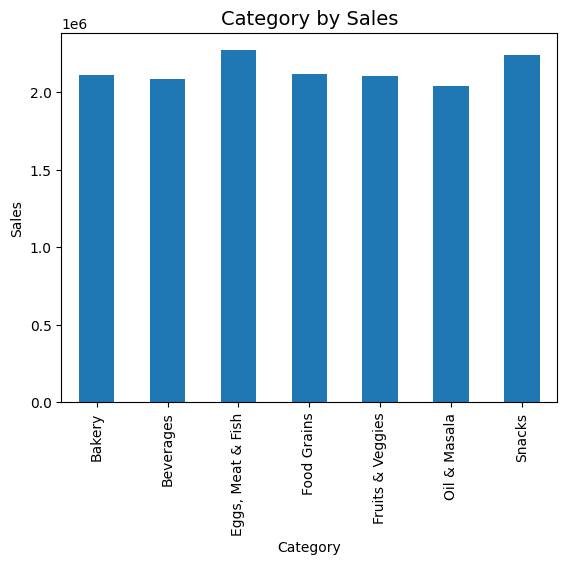

In [ ]:
#Extract month from the order date
#Extract month from the order date
data['month_no'] = data['Order Date'].dt.month
data['Month'] = pd.to_datetime(data['Order Date']).dt.strftime('%B')
data['year'] = data['Order Date'].dt.year

In [ ]:
#check the data to view the added columns
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11.0,November,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11.0,November,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6.0,June,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10.0,October,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10.0,October,2016.0


In [ ]:
# Sum up sales by month
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

In [ ]:
# Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')

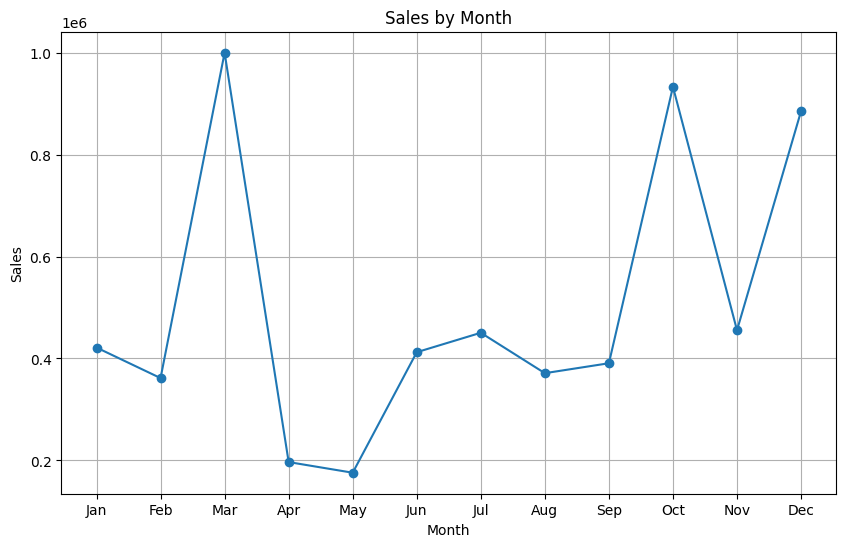

In [ ]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'],
monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [ ]:
#we want to find the Yearly Sales
# we group by Year and get the total number of sales for each year
Yearly_Sales=data.groupby("year")["Sales"].sum()

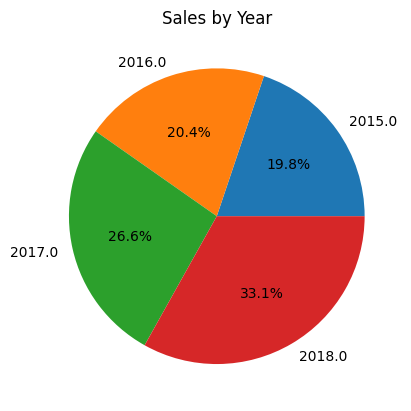

In [ ]:
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,
autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()

In [ ]:
# Extract relevant columns
city_sales = data[['City', 'Sales']]

In [ ]:
# Calculate total sales per city
total_sales = city_sales.groupby('City').sum()

In [ ]:
# Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',
ascending=False)

In [ ]:
# Select the top 5 cities
top_cities = sorted_cities.head(5)

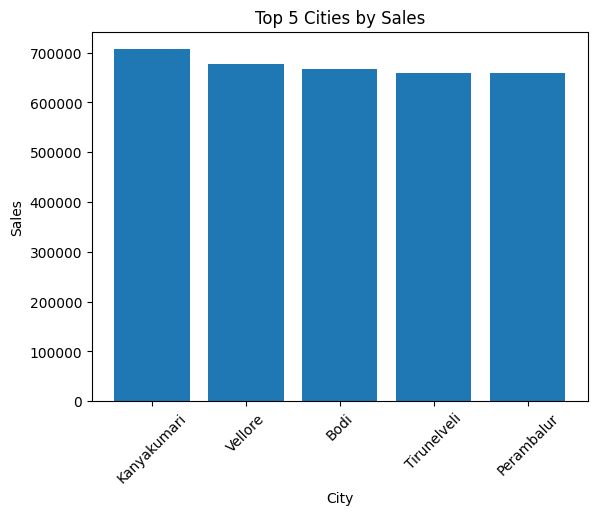

In [ ]:
# Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()